In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import joblib
import os

# Call the dataframe

In [3]:
os.getcwd()

'/Users/carlosito/Library/CloudStorage/OneDrive-Personal/Personal Document/Hexamind/hexamind_code/Carrefour/Clustering/FinalClassifier'

In [4]:
CARREFOUR_FILEPATH = "data/final_carrefour_df.csv"
df = pd.read_csv(CARREFOUR_FILEPATH, index_col=0)

## Call the multi-label classifier tokenizer and model and have prediction

In [5]:
CLF_MODEL_FILEPATH  = "model/clf_bayes.sav"
loaded_clf = joblib.load(CLF_MODEL_FILEPATH)

TOKENIZER_FILEPATH = "model/tokenizer.sav"
loaded_tokenizer = joblib.load(TOKENIZER_FILEPATH)

In [6]:
def create_combined_reviews(titles, reviews):
    if pd.isna(reviews):
        combined_reviews = titles
    else:
        combined_reviews = titles + " " + reviews
        
    return combined_reviews

In [7]:
df['combined_reviews'] = np.vectorize(create_combined_reviews)(df.titles, df.reviews)
assert ~df['combined_reviews'].isnull().any()

In [8]:
df[: 5]

,titles,ratings,reviews,dates,replies,reply_dates,combined_reviews
0,Après carrefour banque qui m’attribue…,1,Après carrefour banque qui m’attribue un plafo...,2023-03-02T09:25:46.000Z,"Bonjour, pouvez-vous s'il vous plait nous comm...",2023-03-02T11:18:49.000Z,Après carrefour banque qui m’attribue… Après c...
1,Produits higt tech .,2,Produits higt tech .\nAcheté 3 mascottes jo 20...,2023-03-02T18:24:09.000Z,"Bonjour, nous vous invitons à nous rejoindre s...",2023-03-03T07:45:39.000Z,Produits higt tech . Produits higt tech .\nAch...
2,Tout d'abord Carrefour Givors c'est…,2,Tout d'abord Carrefour Givors c'est inadmissib...,2023-02-27T19:08:37.000Z,"Bonjour, contact pris avec votre magasin, celu...",2023-02-28T16:01:08.000Z,Tout d'abord Carrefour Givors c'est… Tout d'ab...
3,Carrefour Jeuxey Epinal une catastrophe !! L,1,Ras le bol des rayons vides a toute heure !! I...,2023-02-28T17:39:59.000Z,Merci. Pourriez-vous nous indiquer quels sont ...,2023-03-01T08:29:13.000Z,Carrefour Jeuxey Epinal une catastrophe !! L R...
4,Carrefour Saint André les Vergers…,1,Carrefour Saint André les Vergers (aube)\n450 ...,2023-03-02T22:25:42.000Z,NaN,NaN,Carrefour Saint André les Vergers… Carrefour S...


## Classfify

# 

In [11]:
prediction = loaded_clf.predict(loaded_tokenizer.transform(df.combined_reviews)).toarray()
prediction.shape

(2000, 4)

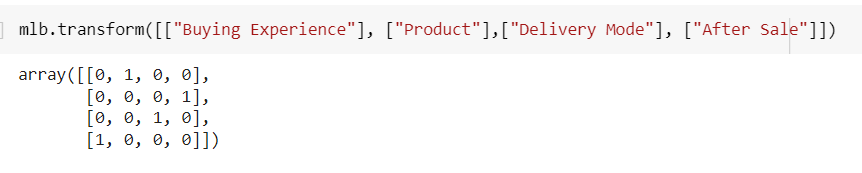

In [13]:
BE_class = prediction[:, 1]
PD_class = prediction[:, 3]
DM_class = prediction[:, 2]
AS_class = prediction[:, 0]

In [16]:
prediction = np.vstack([BE_class, PD_class, DM_class, AS_class]).T
print(prediction.shape)
print(prediction.sum(axis = 0))

(2000, 4)
[1511  292  493  690]


In [21]:
new_columns = ['clean_BE', 'clean_PD', 'clean_DM', 'clean_AS']
prediction_df = pd.DataFrame(prediction, columns=new_columns)
prediction_df.head()


,clean_BE,clean_PD,clean_DM,clean_AS
0,1,0,0,1
1,0,0,0,1
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [26]:
final_df = pd.concat([df, prediction_df], axis=1)
final_df.head()

,titles,ratings,reviews,dates,replies,reply_dates,combined_reviews,clean_BE,clean_PD,clean_DM,clean_AS
0,Après carrefour banque qui m’attribue…,1,Après carrefour banque qui m’attribue un plafo...,2023-03-02T09:25:46.000Z,"Bonjour, pouvez-vous s'il vous plait nous comm...",2023-03-02T11:18:49.000Z,Après carrefour banque qui m’attribue… Après c...,1,0,0,1
1,Produits higt tech .,2,Produits higt tech .\nAcheté 3 mascottes jo 20...,2023-03-02T18:24:09.000Z,"Bonjour, nous vous invitons à nous rejoindre s...",2023-03-03T07:45:39.000Z,Produits higt tech . Produits higt tech .\nAch...,0,0,0,1
2,Tout d'abord Carrefour Givors c'est…,2,Tout d'abord Carrefour Givors c'est inadmissib...,2023-02-27T19:08:37.000Z,"Bonjour, contact pris avec votre magasin, celu...",2023-02-28T16:01:08.000Z,Tout d'abord Carrefour Givors c'est… Tout d'ab...,1,0,0,0
3,Carrefour Jeuxey Epinal une catastrophe !! L,1,Ras le bol des rayons vides a toute heure !! I...,2023-02-28T17:39:59.000Z,Merci. Pourriez-vous nous indiquer quels sont ...,2023-03-01T08:29:13.000Z,Carrefour Jeuxey Epinal une catastrophe !! L R...,1,0,0,0
4,Carrefour Saint André les Vergers…,1,Carrefour Saint André les Vergers (aube)\n450 ...,2023-03-02T22:25:42.000Z,NaN,NaN,Carrefour Saint André les Vergers… Carrefour S...,1,0,0,0


In [32]:
final_df.to_csv('final_carrefour_df_with_label.csv')